C:\Users\vijay\AppData\Local\Temp\ipykernel_19172\1098946938.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\vijay\AppData\Local\Temp\ipykernel_19172\1098946938.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

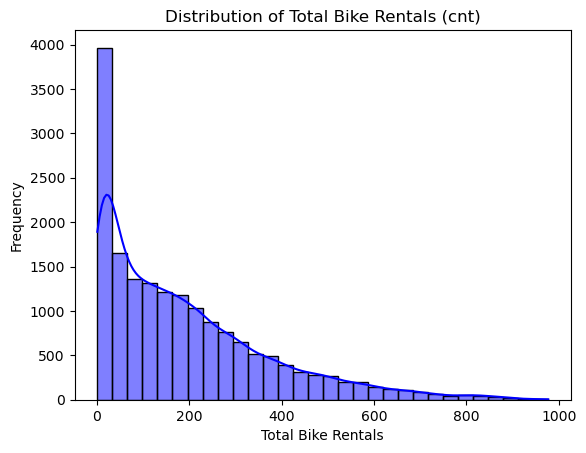

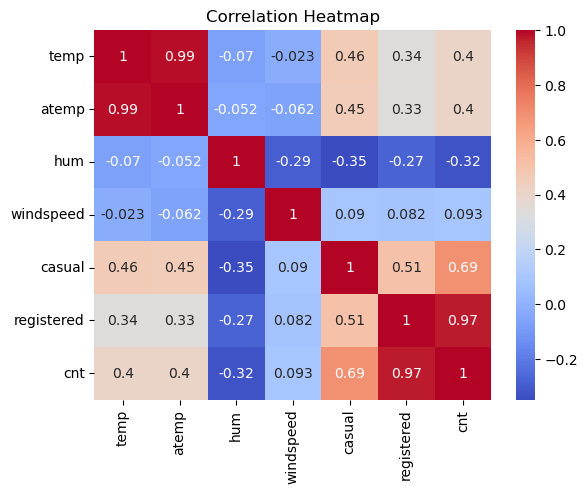

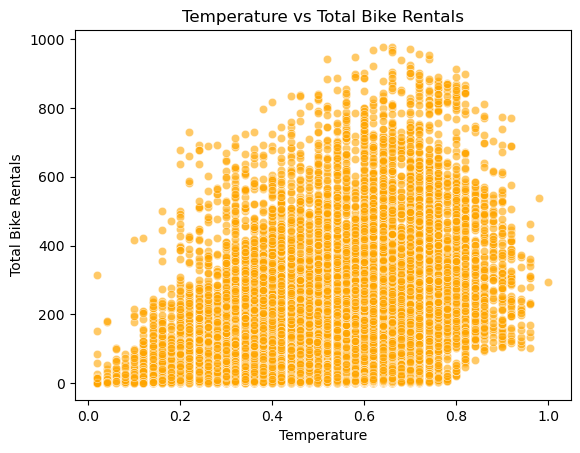

C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Performance:
  RMSE: 5.13
  MAE: 2.16
  R2: 0.9992

Random Forest Performance:
  RMSE: 2.67
  MAE: 0.94
  R2: 0.9998

Gradient Boosting Performance:
  RMSE: 5.08
  MAE: 3.08
  R2: 0.9992

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best Random Forest Model Performance:
  RMSE: 2.65
  R2: 0.9998
Best model saved as 'best_random_forest_model.pkl'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load the dataset
data = pd.read_csv("bike_rent.csv")  # Replace with your file path

# Data Cleaning
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit']

# Convert numerical columns to float
for col in numerical_cols:
    data[col] = data[col].astype(float)

# Impute missing values
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Exploratory Data Analysis (EDA)
sns.histplot(data['cnt'], kde=True, bins=30, color='blue')
plt.title("Distribution of Total Bike Rentals (cnt)")
plt.xlabel("Total Bike Rentals")
plt.ylabel("Frequency")
plt.show()

sns.heatmap(data[numerical_cols + ['cnt']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.scatterplot(x=data['temp'], y=data['cnt'], alpha=0.6, color='orange')
plt.title("Temperature vs Total Bike Rentals")
plt.xlabel("Temperature")
plt.ylabel("Total Bike Rentals")
plt.show()

# Feature Engineering
scaler = MinMaxScaler()
numerical_scaled = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)
categorical_encoded = pd.get_dummies(data[categorical_cols], drop_first=True)
processed_data = pd.concat([numerical_scaled, categorical_encoded, data[['cnt']]], axis=1)

# Train-Test Split
X = processed_data.drop('cnt', axis=1)
y = processed_data['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[name] = {
        "RMSE": mean_squared_error(y_test, predictions, squared=False),
        "MAE": mean_absolute_error(y_test, predictions),
        "R2": r2_score(y_test, predictions)
    }

# Print Model Performance
for model_name, metrics in results.items():
    print(f"{model_name} Performance:")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  R2: {metrics['R2']:.4f}")
    print()

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate the Best Model
rf_predictions = best_rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)
print("Best Random Forest Model Performance:")
print(f"  RMSE: {rf_rmse:.2f}")
print(f"  R2: {rf_r2:.4f}")

# Save the Best Model
joblib.dump(best_rf, "best_random_forest_model.pkl")
print("Best model saved as 'best_random_forest_model.pkl'")
